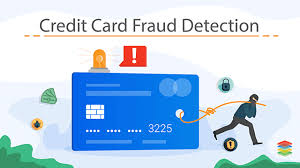

In [67]:
Image(filename='download.jpg', width=900, height=-100)

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('creditcard.csv')

In [5]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [9]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

### This is highly Unblanched
   ##### 0 for Normal Transaction
   ##### 1 for Fraudulent Transaction

In [16]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [18]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [20]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [22]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [24]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## Number of Fraudulent Transactions - 492

In [27]:
legit_sample = legit.sample(n=492)

In [29]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [31]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
98633,66742.0,1.227460,0.313980,-0.541517,0.661029,1.013513,0.731926,0.302246,0.084373,-0.496809,...,-0.400621,-1.214242,-0.081281,-1.761054,0.534348,-0.610651,0.011222,-0.001002,32.40,0
261627,160110.0,1.893110,-0.256167,-0.745859,1.376094,0.150955,0.357954,-0.111076,-0.029188,1.053936,...,-0.539630,-1.304886,0.251784,-1.111104,-0.172344,-1.047185,0.054270,-0.029051,63.00,0
35342,38077.0,-1.530125,-0.048605,1.786142,-1.863523,-0.743962,-0.317946,-0.068851,0.662749,0.757817,...,0.217284,0.290142,-0.142374,0.006296,0.580050,-0.762288,-0.045839,-0.053002,100.00,0
220523,142206.0,2.018812,0.143104,-1.595099,0.341685,0.419987,-0.653336,0.115914,-0.125826,0.156680,...,-0.295556,-0.762773,0.345195,0.681520,-0.298827,0.141119,-0.063515,-0.037773,1.98,0
34940,37888.0,1.476618,-1.130790,-0.237576,-1.700868,-0.900568,-0.217268,-0.811601,-0.023658,-2.063194,...,-0.657296,-1.787042,0.108804,-0.963706,0.153285,-0.587166,-0.004414,0.008016,59.95,0


In [33]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [35]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [37]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94811.077236,-0.123865,-0.063676,0.089126,-0.078490,0.025589,-0.057599,-0.040608,0.024641,0.010585,...,0.013752,0.038736,0.011779,0.014805,-0.002552,-0.033003,-0.001704,0.016593,-0.007976,86.458415
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [39]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [41]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
98633    66742.0  1.227460  0.313980 -0.541517  0.661029  1.013513  0.731926   
261627  160110.0  1.893110 -0.256167 -0.745859  1.376094  0.150955  0.357954   
35342    38077.0 -1.530125 -0.048605  1.786142 -1.863523 -0.743962 -0.317946   
220523  142206.0  2.018812  0.143104 -1.595099  0.341685  0.419987 -0.653336   
34940    37888.0  1.476618 -1.130790 -0.237576 -1.700868 -0.900568 -0.217268   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [43]:
print(Y)

98633     0
261627    0
35342     0
220523    0
34940     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [47]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

# Check shapes
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")

# Ensure Y_train is a 1D array
Y_train = np.ravel(Y_train)

# Make sure you are using the correct dataset for prediction
X_train_prediction = model.predict(X_train)

# Check predictions shape
print(f"X_train_prediction shape: {X_train_prediction.shape}")

# Compute accuracy
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print(f"Training Data Accuracy: {training_data_accuracy}")


In [115]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.999223156092958


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load dataset
credit_card_data = pd.read_csv('creditcard.csv')

# Separate features and labels
X = credit_card_data.drop(columns=['Class'])
y = credit_card_data['Class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)       

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train) 
    y_pred = model.predict(X_test_scaled)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Model: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.63      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962

--------------------------------------------------
Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.81      0.87        98

    accuracy                           1.00     56962
   macro avg       0.98      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962

--------------------------------------------------


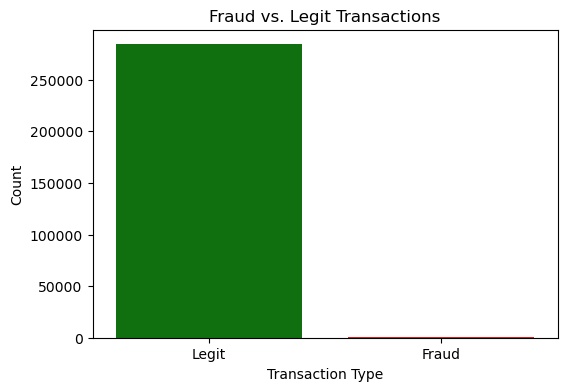

In [73]:
# Countplot of fraud vs. legit transactions
plt.figure(figsize=(6,4))
sns.countplot(data=credit_card_data, x="Class", hue="Class", palette={0: "green", 1: "red"}, legend=False)
plt.xticks([0, 1], ['Legit', 'Fraud'])
plt.title("Fraud vs. Legit Transactions")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

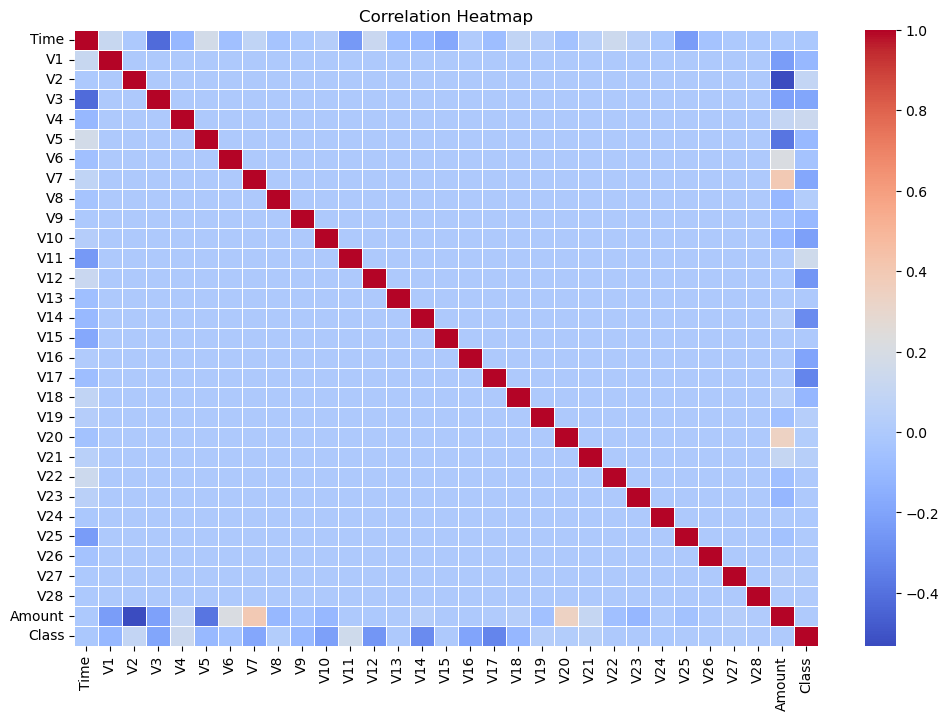

In [74]:
plt.figure(figsize=(12,8))
sns.heatmap(credit_card_data.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [77]:
from imblearn.over_sampling import SMOTE

X = credit_card_data.drop(columns=['Class'])
y = credit_card_data['Class']

smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Before SMOTE:", y.value_counts())
print("After SMOTE:", pd.Series(y_resampled).value_counts())

Before SMOTE: Class
0    284315
1       492
Name: count, dtype: int64
After SMOTE: Class
0    284315
1    142157
Name: count, dtype: int64


In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Convert back to DataFrame
X_resampled_scaled = pd.DataFrame(X_resampled_scaled, columns=X.columns)

In [81]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = credit_card_data.drop(columns=['Class'])  # All columns except 'Class'
y = credit_card_data['Class']  # The target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (227845, 30)
Testing set size: (56962, 30)


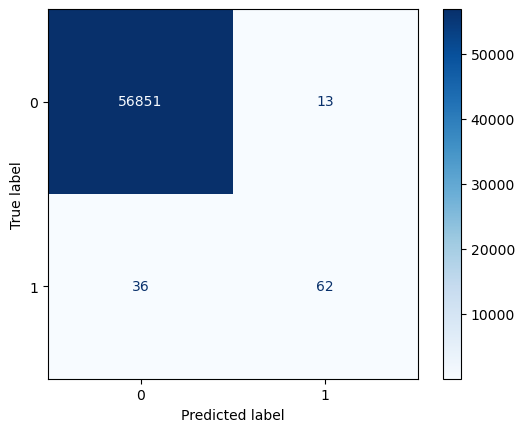

In [109]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Ensure a model is trained first
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = log_model.predict(X_test_scaled)

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')